# **Road accidents' forecast in Belgium**

## **I. Business Problem and Data Understanding**
In this section we will firstly discuss the problem that we face, and secondly we will describe the data set that we used to help us solve it.

### Purpose of the notebook
This notebook presents the results of the investigations on the probabilities of getting a severe road accident in Belgium. Severity is defined in terms of fatality and severe injuries. This notebook would thus be useful for anyone owning a car, since one should be able to see whether it is a good idea to take her car under specific circumstances. The model is going to warn people when they should be more careful than normal, meaning that they should drive slower for instance or try to find an alternative to the car.

### Data set
The open data used for making the present analysis is gathered from the website of "Statbel", the Belgian statistical office. The data can be retrieve on the following link: https://statbel.fgov.be/en/open-data?category=162. It contains 655 467 observation (i.e. road accidents) and 35 attributes (among others day of the week, road type, build up area, type of collision, light conditions, municipality and district, number of deadly accidents in the last 30 days etc.).


In [1]:
#Import of libraries
#-------------------------------
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import of data set
#-------------------------------
df = pd.read_csv(r'C:\Users\NJ5866\Desktop\Final project\Road_accidents_Belgium.csv')
df.head(10)

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,TX_BUILD_UP_AREA_DESCR_FR,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,...,TX_PROV_DESCR_FR,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,27/09/2019,18,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,1.0,Kettingbotsing (4 bestuurders of meer),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,1,1,0,0,0
1,20/11/2019,12,3,Mercredi,woensdag,1.0,Binnen bebouwde kom,En agglomération,4.0,Langs opzij,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
2,15/07/2019,14,1,Lundi,maandag,1.0,Binnen bebouwde kom,En agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
3,20/04/2019,2,6,Samedi,zaterdag,2.0,Buiten bebouwde kom,Hors agglomération,1.0,Kettingbotsing (4 bestuurders of meer),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,1,0
4,25/10/2019,12,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,5.0,Met een voetganger,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
5,28/07/2019,21,7,Dimanche,zondag,2.0,Buiten bebouwde kom,Hors agglomération,7.0,Tegen een hindernis buiten de rijbaan,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
6,18/10/2019,17,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
7,7/10/2019,13,1,Lundi,maandag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
8,29/06/2019,14,6,Samedi,zaterdag,2.0,Buiten bebouwde kom,Hors agglomération,3.0,Langs achteren (of naast elkaar),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
9,26/09/2019,6,4,Jeudi,donderdag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1


As one might notice, some variables are simply translations of others (French and Dutch), so in order to avoid using twice the same variables, we can simplify our data set by removing one of the two columns for each of such variables. Arbitrarily, French has been chosen to be kept. Let's check all variable which need to be removed (column names ending with '_NL'). As one can see, 9 variables will be withdrawn.

In [2]:
df_accidents = df.drop(["TX_DAY_OF_WEEK_DESCR_NL", "TX_BUILD_UP_AREA_DESCR_NL", "TX_COLL_TYPE_DESCR_NL", "TX_LIGHT_COND_DESCR_NL", "TX_ROAD_TYPE_DESCR_NL", "TX_MUNTY_DESCR_NL", "TX_ADM_DSTR_DESCR_NL", "TX_PROV_DESCR_NL", "TX_RGN_DESCR_NL" ], axis=1)
df_accidents.shape

(655468, 26)

The new data set contains now 26 columns (and the same number of lines, i.e. 655 467 observations).  
A description of the variables is described, together with the data type needed, are described in the following table:

|Variable names               | Meaning                                                              | Type of data required|
|-----------------------------| --------------------------------------------------------------------:|---------------------:|
|DT_DAY                       | Date of the accident                                                 | Date                 |
|DT_HOUR                      | Hour of the accident                                                 | Categorical (1-24)   |
|CD_DAY_OF_WEEK               | Day of week of the accident (1 to 7)                                 | Categorical (1-7)    |
|TX_DAY_OF_WEEK_DESCR_FR      | Day of week of the accident in French                                | Categorical          |
|CD_BUILD_UP_AREA             | Code of buildup area: 1 = urban area, 2 = extra-urban                | Categorical (1-2)    |
|TX_BUILD_UP_AREA_DESCR_FR    | Name of buildup area in French                                       | Categorical          |
|CD_COLL_TYPE                 | Type of collision code                                               | Categorical (1-8)    |
|TX_COLL_TYPE_DESCR_FR        | Collision type name in French                                        | Categorical          |
|CD_LIGHT_COND                | light conditions code                                                | Categorical (1-4)    |
|TX_LIGHT_COND_DESCR_FR       | Description of light conditions in French                            | Categorical          |
|CD_ROAD_TYPE                 | Road type code                                                       | Categorical (1-2)    |
|TX_ROAD_TYPE_DESCR_FR        | Road type description in French                                      | Categorical          |             
|CD_MUNTY_REFNIS              | NSI-code of the municipality                                         | Categorical          |
|TX_MUNTY_DESCR_FR            | Municipality name in French                                          | Categorical          |
|CD_DSTR_REFNIS               | NSI-code of the district                                             | Categorical          |
|TX_ADM_DSTR_DESCR_FR         | Name of the district in French                                       | Categorical          |
|CD_PROV_REFNIS               | NSI-code of the district                                             | Categorical          |
|TX_PROV_DESCR_FR             | Name of the province in French                                       | Categorical          |
|CD_RGN_REFNIS                | NSI-code of the region                                               | Categorical          |
|TX_RGN_DESCR_FR              | Name of the region in French                                         | Categorical          |
|MS_ACCT                      | Number of accidents with dead or injured                             | Integer              |
|MS_ACCT_WITH_DEAD            | Number of accidents with dead                                        | Integer              |
|MS_ACCT_WITH_DEAD_30_DAYS    | Number of accidents with dead, in the 30 days following the accident | Integer              |
|MS_ACCT_WITH_MORY_INJ        | Number of accidents with mortally injured                            | Integer              |
|MS_ACCT_WITH_SERLY_INJ       | Number of accidents with severely injured                            | Integer              |
|MS_ACCT_WITH_SLY_INJ         | Number of accidents with slightly injured                            | Integer              |

Let's now convert the type of some variables (e.g. DT_DAY to datetime, DT_HOUR to categorical...)

In [3]:
# DT_DAY typecasting to datetime, and renaming to 'DATE'
df_accidents['DATE'] = pd.to_datetime(df_accidents['DT_DAY'])
df_accidents = df_accidents.drop('DT_DAY', axis=1)

In [4]:
#Changing the dataframe to the right data formats: lots of castings to categorical, dropping of French descriptions
categorical_variables = ['DT_HOUR', 'CD_DAY_OF_WEEK', 'CD_BUILD_UP_AREA', 'CD_COLL_TYPE', 'CD_LIGHT_COND', 'CD_ROAD_TYPE', 'CD_MUNTY_REFNIS', 'CD_DSTR_REFNIS', 'CD_PROV_REFNIS', 'CD_RGN_REFNIS']
df_cat = df_accidents[categorical_variables].astype('category')

df_accidents = pd.concat([df_accidents['DATE'], df_cat, df_accidents[['MS_ACCT','MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'] ]], axis=1)

In [5]:
# Check that all variables are the same type as expected and described earlier
df_accidents.dtypes

DATE                         datetime64[ns]
DT_HOUR                            category
CD_DAY_OF_WEEK                     category
CD_BUILD_UP_AREA                   category
CD_COLL_TYPE                       category
CD_LIGHT_COND                      category
CD_ROAD_TYPE                       category
CD_MUNTY_REFNIS                    category
CD_DSTR_REFNIS                     category
CD_PROV_REFNIS                     category
CD_RGN_REFNIS                      category
MS_ACCT                               int64
MS_ACCT_WITH_DEAD                     int64
MS_ACCT_WITH_DEAD_30_DAYS             int64
MS_ACCT_WITH_MORY_INJ                 int64
MS_ACCT_WITH_SERLY_INJ                int64
MS_ACCT_WITH_SLY_INJ                  int64
dtype: object

Now let us define additional variables, which are new definition of "DATE" in terms of "DAY" (day of the month), "MONTH", "QUARTER" and "YEAR". This will allow us to check whether there exist general trends or seasonal effects for example. Once those new variables are added to the data set "df_accidents" we can start the Exploratory Data Analysis.

In [6]:
df_accidents['DAY'] = df_accidents['DATE'].apply(lambda date: date.day)
df_accidents['MONTH'] = df_accidents['DATE'].apply(lambda date: date.month)
df_accidents['QUARTER'] = df_accidents['DATE'].apply(lambda date: date.quarter)
df_accidents['YEAR'] = df_accidents['DATE'].apply(lambda date: date.year)

In [7]:
df_accidents.index = pd.DatetimeIndex(df_accidents['DATE'])

## **II. Exploratory Data Analysis**

First of all, let's get acquainted with the data that we are dealing with. A first step is to check the distribution plot of the number of accidents that we have. From what we can see below, this is pretty well approximated by a normal distribution.

<Figure size 864x576 with 0 Axes>

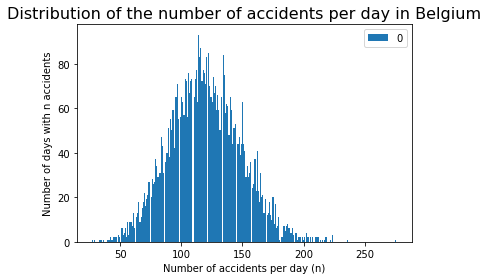

In [8]:
daily_accidents = pd.DataFrame(df_accidents.resample('D').size())
plt.figure(figsize=(12,8))
daily_accidents.plot(kind = 'hist', bins=270)

plt.title("Distribution of the number of accidents per day in Belgium", fontsize = 16)
plt.xlabel("Number of accidents per day (n)")
plt.ylabel("Number of days with n accidents")

plt.show()

Now that we know how the accidents are distributed, it would be interesting to know how those accidents are evolving with time.
From what we can see below, there is a general trend of decreasing number of accidents with time (in years), while we can also guess some kind of seasonal effects. 

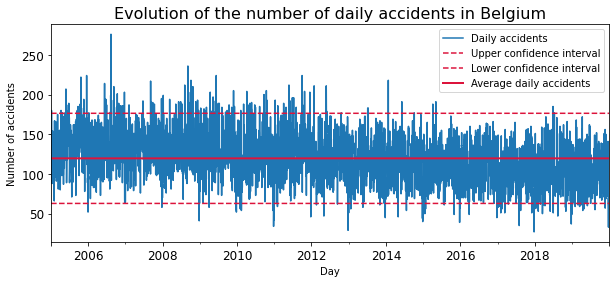

In [9]:
# Adding Mean and Standard deviation to the data set of "daily_accidents"
daily_accidents['MEAN'] = df_accidents.resample('D').size().mean()
daily_accidents['STD'] = df_accidents.resample('D').size().std()

# Under the assumption of normal distribution, 95% of data contained in mean +/- 1.96*std
up_conf_int = daily_accidents['MEAN'] + 1.96 * daily_accidents['STD']
low_conf_int = daily_accidents['MEAN'] - 1.96 * daily_accidents['STD']

plt.figure(figsize=(10,4))
df_accidents.resample('D').size().plot(label='Daily accidents')
up_conf_int.plot(color='crimson', ls='--', linewidth=1.5, label='Upper confidence interval')
low_conf_int.plot(color='crimson', ls='--', linewidth=1.5, label='Lower confidence interval')
daily_accidents['MEAN'].plot(color='crimson', linewidth=2, label='Average daily accidents')

plt.title('Evolution of the number of daily accidents in Belgium', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=12)
plt.legend(prop={'size':10})

### Accidents depend on the moment(s) of the year(s)

In [10]:
# Renaming column 0 by DAILY_ACC => the number of daily accidents
daily_accidents.rename(columns={0:'DAILY_ACC'}, inplace = 'TRUE')

#Adding a column DATE in the daily_accidents dataframe
daily_accidents['DATE'] = daily_accidents.index.values

#creating new variables corresponding to DAY, MONTH, QUARTER and YEAR
daily_accidents['DAY'] = daily_accidents['DATE'].apply(lambda date: date.day)
daily_accidents['MONTH'] = daily_accidents['DATE'].apply(lambda date: date.month)
daily_accidents['QUARTER'] = daily_accidents['DATE'].apply(lambda date: date.quarter)
daily_accidents['YEAR'] = daily_accidents['DATE'].apply(lambda date: date.year)
daily_accidents.head()

,DAILY_ACC,MEAN,STD,DATE,DAY,MONTH,QUARTER,YEAR
DATE,,,,,,,,
2005-01-01,94,119.654618,28.961461,2005-01-01,1,1,1,2005
2005-01-02,103,119.654618,28.961461,2005-01-02,2,1,1,2005
2005-01-03,96,119.654618,28.961461,2005-01-03,3,1,1,2005
2005-01-04,138,119.654618,28.961461,2005-01-04,4,1,1,2005
2005-01-05,180,119.654618,28.961461,2005-01-05,5,1,1,2005


[Text(0, 0.5, 'Daily number of accidents'),
 Text(0.5, 0, 'Month of the year'),
 Text(0.5, 1.0, 'Number of daily accidents for each month of the year')]

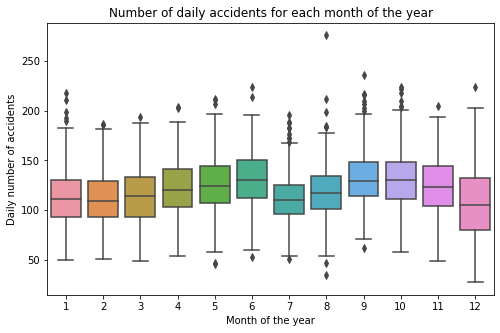

In [11]:
plt.figure(figsize=(8,5))
ax = sns.boxplot( x=daily_accidents["MONTH"], y=daily_accidents['DAILY_ACC'] )
ax.set(xlabel ='Month of the year', ylabel = 'Daily number of accidents', title= 'Number of daily accidents for each month of the year')

[Text(0, 0.5, 'Daily number of accidents'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Number of daily accidents for each year')]

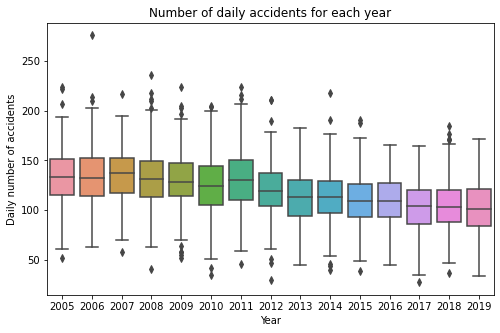

In [12]:
plt.figure(figsize=(8,5))
ax = sns.boxplot( x=daily_accidents["YEAR"], y=daily_accidents['DAILY_ACC'] )
ax.set(xlabel ='Year', ylabel = 'Daily number of accidents', title= 'Number of daily accidents for each year')

[Text(0, 0.5, 'Daily number of accidents'),
 Text(0.5, 0, 'Quarter of the year'),
 Text(0.5, 1.0, 'Number of daily accidents for each quarter of the year')]

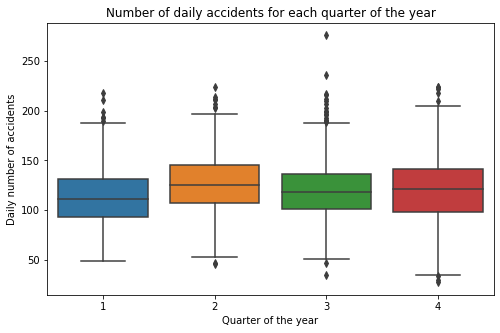

In [13]:
plt.figure(figsize=(8,5))
ax = sns.boxplot( x=daily_accidents["QUARTER"], y=daily_accidents['DAILY_ACC'] )
ax.set(xlabel ='Quarter of the year', ylabel = 'Daily number of accidents', title= 'Number of daily accidents for each quarter of the year')

From the boxplots above, one can clearly see that the number of daily accidents is clearly dependent on the the timing, e.g. in July the number of accidents sharply collapses, in comparison to the month of June. This can probably be explained by the fact that many belgian citizen are leaving the country and go on holiday abroad (reducing the number of cars, hence the number of potential accidents). We also see that the number of accidents is slowly going down year after year (as already mentioned before).  


We can now create a table to see at which moment of the year we are more prone to get an accident. As predicted, we can see some patterns in the number of accidents per day. Just before christmas until 1st of January for example, the number of daily accidents is sharply reduced. On the contrary, the two last 10 days of June are significantly more dangerous than most of the year.  
  

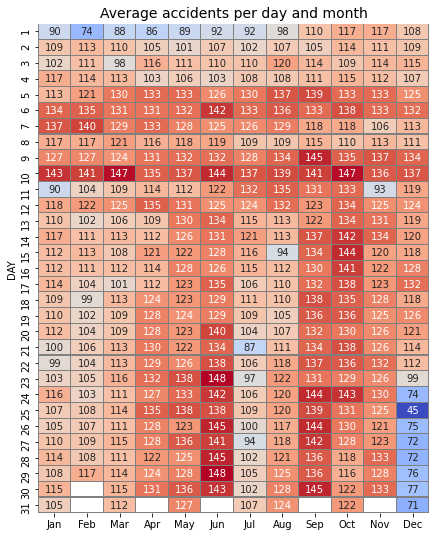

In [14]:
pivot = df_accidents.pivot_table(values='DATE', index='DAY', columns='MONTH', aggfunc=len)
pivot_date_count = df_accidents.pivot_table(values='DATE', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
avg_accidents = pivot/pivot_date_count
avg_accidents.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(7,9))
plt.title('Average accidents per day and month', fontsize=14)
sns.heatmap(avg_accidents.round(), cmap='coolwarm', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")

In [15]:
# Adding day of week to the data frame daily_accidents
DOW = list()
for i in range (0, len(daily_accidents['DATE'])):
    DOW.append(daily_accidents['DATE'][i].weekday())
daily_accidents['DOW'] = DOW
daily_accidents.head()

,DAILY_ACC,MEAN,STD,DATE,DAY,MONTH,QUARTER,YEAR,DOW
DATE,,,,,,,,,
2005-01-01,94,119.654618,28.961461,2005-01-01,1,1,1,2005,5
2005-01-02,103,119.654618,28.961461,2005-01-02,2,1,1,2005,6
2005-01-03,96,119.654618,28.961461,2005-01-03,3,1,1,2005,0
2005-01-04,138,119.654618,28.961461,2005-01-04,4,1,1,2005,1
2005-01-05,180,119.654618,28.961461,2005-01-05,5,1,1,2005,2


[Text(0, 0.5, 'Daily number of accidents'),
 Text(0.5, 0, 'Day of the week'),
 Text(0.5, 1.0, 'Number of daily accidents for each day of the week')]

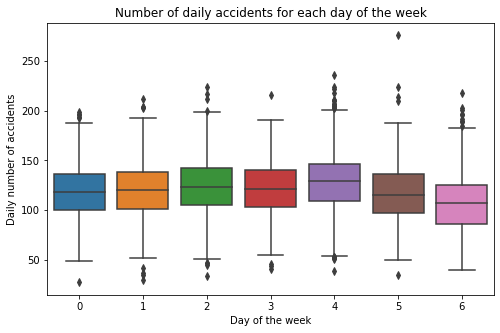

In [16]:
plt.figure(figsize=(8,5))
ax = sns.boxplot( x=daily_accidents['DOW'], y=daily_accidents['DAILY_ACC'] )
ax.set(xlabel ='Day of the week', ylabel = 'Daily number of accidents', title= 'Number of daily accidents for each day of the week')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium depending on the hour')]

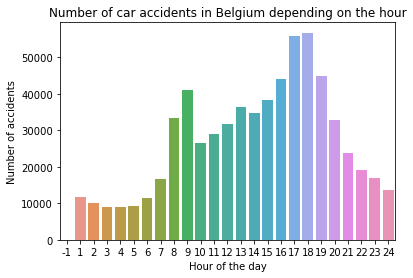

In [17]:
ax = sns.countplot(df_accidents['DT_HOUR'])
ax.set(xlabel='Hour of the day', ylabel ='Number of accidents', title ='Number of car accidents in Belgium depending on the hour')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Build up area type'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium per build up area')]

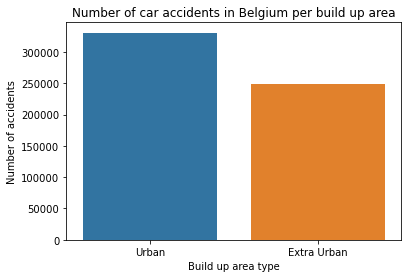

In [18]:
df_accidents['CD_BUILD_UP_AREA'] = df_accidents['CD_BUILD_UP_AREA'].cat.rename_categories(["Urban", "Extra Urban"])
ax = sns.countplot(df_accidents['CD_BUILD_UP_AREA'])
ax.set(xlabel='Build up area type', ylabel ='Number of accidents', title ='Number of car accidents in Belgium per build up area')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Type of collision'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium per collision type')]

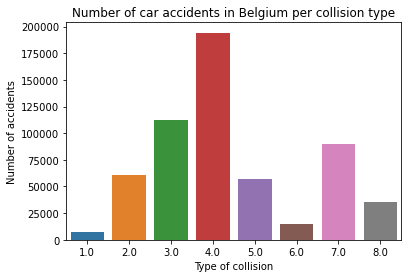

In [19]:
ax = sns.countplot(df_accidents['CD_COLL_TYPE'])
ax.set(xlabel='Type of collision', ylabel ='Number of accidents', title ='Number of car accidents in Belgium per collision type')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Light conditions'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium per light condition')]

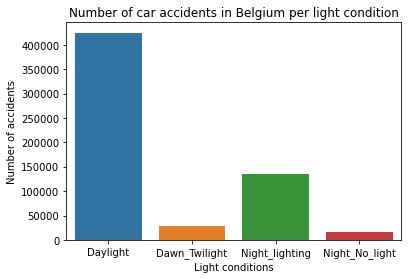

In [20]:
df_accidents['CD_LIGHT_COND'] = df_accidents['CD_LIGHT_COND'].cat.rename_categories(['Daylight', 'Dawn_Twilight', 'Night_lighting', 'Night_No_light'])
ax = sns.countplot(df_accidents['CD_LIGHT_COND'])
ax.set(xlabel='Light conditions', ylabel ='Number of accidents', title ='Number of car accidents in Belgium per light condition')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Road type'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium per road type')]

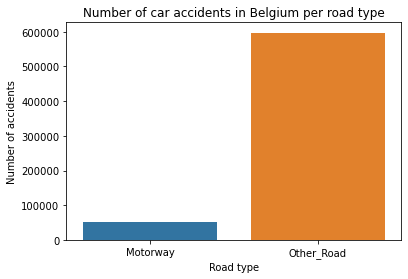

In [21]:
df_accidents['CD_ROAD_TYPE'] = df_accidents['CD_ROAD_TYPE'].cat.rename_categories(['Motorway', 'Other_Road'])
ax = sns.countplot(df_accidents['CD_ROAD_TYPE'])
ax.set(xlabel='Road type', ylabel ='Number of accidents', title ='Number of car accidents in Belgium per road type')

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 0, 'Region'),
 Text(0.5, 1.0, 'Number of car accidents in Belgium per region')]

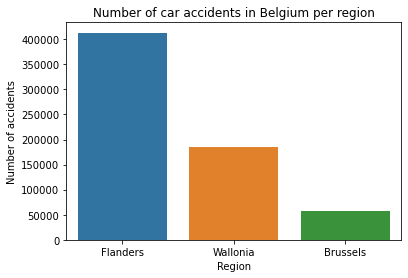

In [22]:
df_accidents['CD_RGN_REFNIS'] = df_accidents['CD_RGN_REFNIS'].cat.rename_categories(['Flanders', 'Wallonia', 'Brussels'])
ax = sns.countplot(df_accidents['CD_RGN_REFNIS'])
ax.set(xlabel='Region', ylabel ='Number of accidents', title ='Number of car accidents in Belgium per region')

The main objective of this project is to warn drivers when there are high chances of severe car accidents. One can define a severe accident as an accident which is either with dead, with dead in the 30 days following the accident, as mortally injured or severely injured. One can now define that variable (called "SEVERE_ACC") and add it to our Data Frame df_accidents.

In [25]:
# TO DO ONLY ONCE (SINCE TIME CONSUMING): Compute SEVERE_ACC and add it to df_accidents so that not needed anymore. Then, export the DataFrame to CSV, can be openened next time.
# ----------------------------------------------------------------------------------------------------------------
# SEVERE_ACC = [None]*(len(df_accidents))
# for i in range(len(df_accidents)):
#       SEVERE_ACC[i] = df_accidents['MS_ACCT_WITH_DEAD'][i] or df_accidents['MS_ACCT_WITH_DEAD_30_DAYS'][i] or df_accidents['MS_ACCT_WITH_MORY_INJ'][i] or df_accidents['MS_ACCT_WITH_SERLY_INJ'][i]
# df_accidents['SEVERE_ACC'] = SEVERE_ACC        
# df_accidents.to_csv(r'C:\Users\NJ5866\Desktop\Final project\Road_accidents_Belgium_SEVERE.csv', index=False)        

In [23]:
df_SEVERE = pd.read_csv(r'C:\Users\NJ5866\Desktop\Final project\Road_accidents_Belgium_SEVERE.csv')
df_SEVERE.head()

,DATE,DT_HOUR,CD_DAY_OF_WEEK,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,DAY,MONTH,QUARTER,YEAR,SEVERE_ACC
0,2019-09-27,18,5,Extra Urban,1.0,Daylight,Motorway,11001,11000,10000.0,...,1,1,0,0,0,27,9,3,2019,1
1,2019-11-20,12,3,Urban,4.0,Daylight,Other_Road,11001,11000,10000.0,...,0,0,0,0,1,20,11,4,2019,0
2,2019-07-15,14,1,Urban,NaN,Daylight,Other_Road,11001,11000,10000.0,...,0,0,0,0,1,15,7,3,2019,0
3,2019-04-20,2,6,Extra Urban,1.0,Night_lighting,Motorway,11001,11000,10000.0,...,0,0,0,1,0,20,4,2,2019,1
4,2019-10-25,12,5,Extra Urban,5.0,Daylight,Other_Road,11001,11000,10000.0,...,0,0,0,0,1,25,10,4,2019,0


Since we are interested in the occurence of severe accidents in general, and not in particular cases, we can remove the specific attributes related to the severity of the accidents (except of course for 'SEVERE_ACC', which is the main objective of this research).
Apart from that, we can also remove variables if they are duplicates of others. This will be done via the correlation matrix, taking into account all numerical variables. 

We can observe that some attributes are highly correlated and redundent, that is why we can drop some of them. Variables Quarter and Month are highly correlated (97%), hence one can drop one of the two (Quarter will be dissmissed), since almost all the information is contained in each variable. The municipality, district and province also display the same information, this is why districts and municipalities will be dropped.

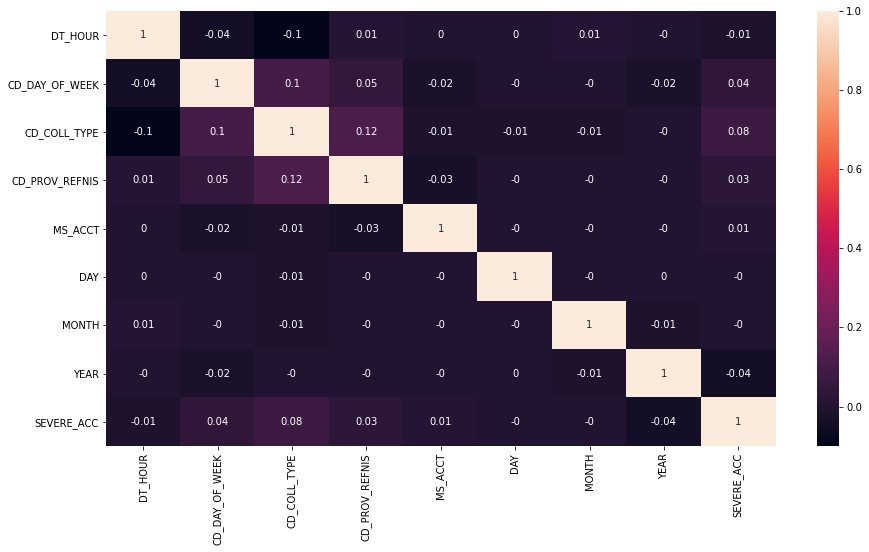

In [24]:
df_SEVERE = df_SEVERE.drop(['MS_ACCT_WITH_DEAD','MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_SLY_INJ', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'QUARTER','CD_DSTR_REFNIS', 'CD_MUNTY_REFNIS'], axis=1)

plt.figure(figsize=(15,8))
sns.heatmap(df_SEVERE.corr().round(2),annot=True)

In [25]:
df_SEVERE.head()

,DATE,DT_HOUR,CD_DAY_OF_WEEK,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_PROV_REFNIS,CD_RGN_REFNIS,MS_ACCT,DAY,MONTH,YEAR,SEVERE_ACC
0,2019-09-27,18,5,Extra Urban,1.0,Daylight,Motorway,10000.0,Flanders,1,27,9,2019,1
1,2019-11-20,12,3,Urban,4.0,Daylight,Other_Road,10000.0,Flanders,1,20,11,2019,0
2,2019-07-15,14,1,Urban,NaN,Daylight,Other_Road,10000.0,Flanders,1,15,7,2019,0
3,2019-04-20,2,6,Extra Urban,1.0,Night_lighting,Motorway,10000.0,Flanders,1,20,4,2019,1
4,2019-10-25,12,5,Extra Urban,5.0,Daylight,Other_Road,10000.0,Flanders,1,25,10,2019,0


## **III. Data Cleaning**

### NaN values

In [26]:
df_SEVERE.isnull().sum()

DATE                    0
DT_HOUR                 0
CD_DAY_OF_WEEK          0
CD_BUILD_UP_AREA    76521
CD_COLL_TYPE        83748
CD_LIGHT_COND       50663
CD_ROAD_TYPE         6118
CD_PROV_REFNIS      57442
CD_RGN_REFNIS           0
MS_ACCT                 0
DAY                     0
MONTH                   0
YEAR                    0
SEVERE_ACC              0
dtype: int64

In [27]:
missing = [i for i in df_SEVERE.columns if df_SEVERE[i].isnull().sum() >0]
missing

['CD_BUILD_UP_AREA',
 'CD_COLL_TYPE',
 'CD_LIGHT_COND',
 'CD_ROAD_TYPE',
 'CD_PROV_REFNIS']

For each missing value of an attribute, we will allocate the value with highest likelyhood of occurring (i.e. the most observed values in our data set df_accidents). For example, 330600 accidents happend in urban areas, compared to 248347 in Extra-urban, hence all missing values will be set as urban accidents.

In [28]:
for i in missing:
    print(df_SEVERE[i].value_counts())

Urban          330600
Extra Urban    248347
Name: CD_BUILD_UP_AREA, dtype: int64
4.0    194245
3.0    112384
7.0     90087
2.0     60768
5.0     57399
8.0     35150
6.0     14692
1.0      6995
Name: CD_COLL_TYPE, dtype: int64
Daylight          424555
Night_lighting    134218
Dawn_Twilight      29186
Night_No_light     16846
Name: CD_LIGHT_COND, dtype: int64
Other_Road    597112
Motorway       52238
Name: CD_ROAD_TYPE, dtype: int64
10000.0    114083
40000.0    107814
30000.0     82789
50000.0     64612
60000.0     58275
20001.0     55487
70000.0     52787
90000.0     26949
20002.0     18474
80000.0     16756
Name: CD_PROV_REFNIS, dtype: int64


In [29]:
for i in missing:
    
    if i == 'CD_BUILD_UP_AREA':
        df_SEVERE[i].fillna("Urban", inplace = True) 
    elif i == 'CD_COLL_TYPE':
        df_SEVERE[i].fillna(4, inplace = True) 
    elif i == 'CD_LIGHT_COND':
        df_SEVERE[i].fillna("Daylight", inplace = True) 
    elif i == 'CD_ROAD_TYPE':
        df_SEVERE[i].fillna("Other_Road", inplace = True) 
    else:
        df_SEVERE[i].fillna(10000.0, inplace = True)

## **IV. Models Building**

### Undersampling

Since our data set is unbalanced, i.e. the number of severe accidents in comparison with the total number of accidents (observations in the data set) is really low, we must firstly rebalance it. As one can observe below, only 12% of the accidents are defined as severe. Hence, as a first step, we need to resample the data set. Since the number of total severe accidents is already around 80k, it has been decided to undersample our dataset (reduce the number of samples which are benign (not severe)).

Number of benign vs severe accidents:
0    0.879477
1    0.120468
2    0.000055
Name: SEVERE_ACC, dtype: float64


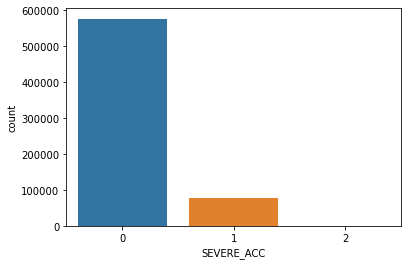

In [30]:
sns.countplot(df_SEVERE['SEVERE_ACC'])
print("Number of benign vs severe accidents:")
print(df_SEVERE['SEVERE_ACC'].value_counts()/len(df_SEVERE))

In [31]:
# Class count
Class_count_0, Class_count_1, Class_count_2 = df_SEVERE.SEVERE_ACC.value_counts()

print('Class_0:', Class_count_0)
print('Class_1: ', Class_count_1)
print('Class_2: ', Class_count_2 )

Class_0: 576469
Class_1:  78963
Class_2:  36


In [32]:
# Divide data set by class,  we drop Class_2, since they represent only 36 observations and are kind of outliers
Accidents_class_0 = df_SEVERE[df_SEVERE['SEVERE_ACC'] == 0]
Accidents_class_1 = df_SEVERE[df_SEVERE['SEVERE_ACC'] == 1]

Random under-sampling: 
1    78963
0    78963
Name: SEVERE_ACC, dtype: int64


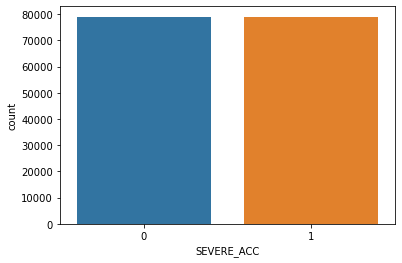

In [33]:
df_class_0_under = Accidents_class_0.sample(Class_count_1)
df_SEVERE_sampled = pd.concat([df_class_0_under, Accidents_class_1], axis =0)

print('Random under-sampling: ')
print(df_SEVERE_sampled.SEVERE_ACC.value_counts())

sns.countplot(df_SEVERE_sampled['SEVERE_ACC'])

### Preprocessing
The next step consists in casting the object variables into dummy variables in order to be able to apply the machine learning algorithms.

In [35]:
# Casting String variables into categorical
df_SEVERE_sampled['CD_BUILD_UP_AREA'] = df_SEVERE_sampled['CD_BUILD_UP_AREA'].astype('category')
df_SEVERE_sampled['CD_LIGHT_COND'] = df_SEVERE_sampled['CD_LIGHT_COND'].astype('category')
df_SEVERE_sampled['CD_ROAD_TYPE'] = df_SEVERE_sampled['CD_ROAD_TYPE'].astype('category')
df_SEVERE_sampled['CD_PROV_REFNIS'] = df_SEVERE_sampled['CD_PROV_REFNIS'].astype('category')
df_SEVERE_sampled['CD_RGN_REFNIS'] = df_SEVERE_sampled['CD_RGN_REFNIS'].astype('category')



# Casting categorical into Dummy variables => in order to be able to perform ML algos
from sklearn import preprocessing
le_BUILD_UP_AREA = preprocessing.LabelEncoder()
le_BUILD_UP_AREA.fit(['Urban','Extra Urban'])
df_SEVERE_sampled['CD_BUILD_UP_AREA'] = le_BUILD_UP_AREA.transform(df_SEVERE_sampled['CD_BUILD_UP_AREA']) 

le_LIGHT_COND = preprocessing.LabelEncoder()
le_LIGHT_COND.fit(['Daylight', 'Dawn_Twilight', 'Night_lighting', 'Night_No_light'])
df_SEVERE_sampled['CD_LIGHT_COND'] = le_LIGHT_COND.transform(df_SEVERE_sampled['CD_LIGHT_COND'])

le_ROAD_TYPE = preprocessing.LabelEncoder()
le_ROAD_TYPE.fit(['Motorway', 'Other_Road'])
df_SEVERE_sampled['CD_ROAD_TYPE'] = le_ROAD_TYPE.transform(df_SEVERE_sampled['CD_ROAD_TYPE'])

le_REGION = preprocessing.LabelEncoder()
le_REGION.fit(['Flanders', 'Wallonia', 'Brussels'])
df_SEVERE_sampled['CD_RGN_REFNIS'] = le_REGION.transform(df_SEVERE_sampled['CD_RGN_REFNIS'])

le_PROVINCE = preprocessing.LabelEncoder()
le_PROVINCE.fit([10000.0, 20001.0, 20002.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0])
df_SEVERE_sampled['CD_PROV_REFNIS'] = le_PROVINCE.transform(df_SEVERE_sampled['CD_PROV_REFNIS']) 

df_SEVERE_sampled.head()

,DATE,DT_HOUR,CD_DAY_OF_WEEK,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_PROV_REFNIS,CD_RGN_REFNIS,MS_ACCT,DAY,MONTH,YEAR,SEVERE_ACC
102372,2017-05-25,15,4,0,4.0,1,0,60000.0,2,1,25,5,2017,0
325552,2011-03-08,18,3,1,4.0,1,1,10000.0,1,1,8,3,2011,0
413151,2009-05-01,18,1,1,4.0,2,1,10000.0,1,1,1,5,2009,0
363726,2011-10-25,8,2,1,4.0,1,1,20001.0,1,1,25,10,2011,0
160510,2015-01-28,13,3,1,3.0,1,1,10000.0,0,1,28,1,2015,0


### Splitting Train and Test sets
Let's now split our data set df_SEVERE_sampled into training and test sets, with 80% of the data used to train our models and 20% to test them.

In [53]:
df_SEVERE_sampled.columns

Index(['DATE', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'CD_BUILD_UP_AREA', 'CD_COLL_TYPE',
       'CD_LIGHT_COND', 'CD_ROAD_TYPE', 'CD_PROV_REFNIS', 'CD_RGN_REFNIS',
       'MS_ACCT', 'DAY', 'MONTH', 'YEAR', 'SEVERE_ACC'],
      dtype='object')

In [54]:
# definition of features set X and target variable y
# note: DATE and YEAR have been dropped
X = df_SEVERE_sampled[['DT_HOUR', 'CD_DAY_OF_WEEK', 'CD_BUILD_UP_AREA', 'CD_COLL_TYPE',
       'CD_LIGHT_COND', 'CD_ROAD_TYPE', 'CD_PROV_REFNIS', 'CD_RGN_REFNIS', 'DAY', 'MONTH']].values
y = df_SEVERE_sampled['SEVERE_ACC'].values

In [55]:
# Normalization of data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (126340, 10) (126340,)
Test set: (31586, 10) (31586,)


### K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

Let's start the algorithm with k = 4

In [58]:
k = 4

# Training the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting the test set
yhat = neigh.predict(X_test)

# Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.7211255342725977
Test set Accuracy:  0.5599949344646362


Now, let's check what can be the best value for k between one and 9

In [59]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('Mean accuracy for each k: ',mean_acc)

Mean accuracy for each k:  [0.54710948 0.54299373 0.56167289 0.55999493 0.57386184 0.57018932
 0.58114354 0.57889571 0.58503767]


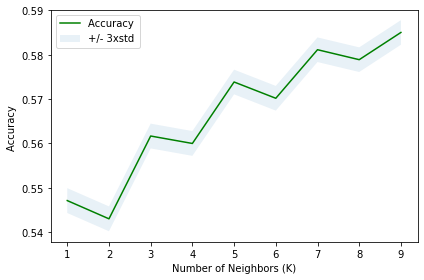

In [60]:
# Plotting the accuracies for different k's
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [61]:
# Test with k = 30
k = 30

# Training the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting the test set
yhat = neigh.predict(X_test)

# Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6401298084533797
Test set Accuracy:  0.6036218577850947


As one can see, although we increased the number of neighbors from 9 to 30, the accuracy did not improve greatly. It means that taking a number of neighbors k = 9 is good for our KNN model. The accuracy achieved is 0.585%. Let's see if we can do better with other methods. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
